In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import tqdm
from sklearn.model_selection import train_test_split
import copy
%matplotlib inline

In [225]:
import copy
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
 
# Read data
data = np.loadtxt('plate number data.csv', delimiter=',')
X, y = data[:,0:6], data[:,6]
 
# train-test split for model evaluation
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

#scale
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)


# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


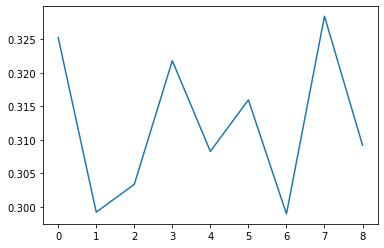

In [229]:
A_nodes = 67
B_nodes = 66
MSE_record = []
rsq_record = []
n_epochs = 10000
epoch_increase = 20

for i in range(1,10):
    # Define the model
    model = nn.Sequential(
    nn.Linear(6, 67),
    #nn.ReLU(),
    nn.Linear(67, B_nodes),
    #nn.Sigmoid(),
    #nn.ReLU(),
    #nn.Linear(4, 4),
    #nn.ReLU(),
    nn.Linear(B_nodes, 1)
)
 
    # loss function and optimizer
    loss_fn = nn.MSELoss()  # mean square error
    optimizer = optim.SGD(model.parameters(), lr=0.0001)
 
    n_epochs = (n_epochs+epoch_increase)   # number of epochs to run
    batch_size = 20  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)
 
    # Hold the best model
    best_mse = np.inf   # init to infinity
    best_weights = None
    history = []
    rsqhist = []
 
    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                bar.set_postfix(mse=float(loss))
                
        # evaluate accuracy at end of each epoch
        model.eval()
        y_pred = model(X_test)
        mse = loss_fn(y_pred, y_test)
        #rsq = r2_score(y_pred, y_test)
        #rsq = float(rsq)
        mse = float(mse)
        history.append(mse)
        #rsqhist.append(rsq)
        if mse < best_mse:
            best_mse = mse
            best_weights = copy.deepcopy(model.state_dict())
        #if rsq < bestrsq:
            #bestrsq = rsq

    A_nodes = (A_nodes+1)
    B_nodes = (B_nodes+1)
    MSE_record.append(best_mse)
    #rsq_record.append(rsq)
#restore model and return best accuracy
    model.load_state_dict(best_weights)
    #print("MSE: %.2f" % best_mse)
    #print("RMSE: %.2f" % np.sqrt(best_mse))
    #print("loop number: ", (A_nodes-2))
plt.plot(MSE_record)
#plt.plot(rsq_record)
plt.show()

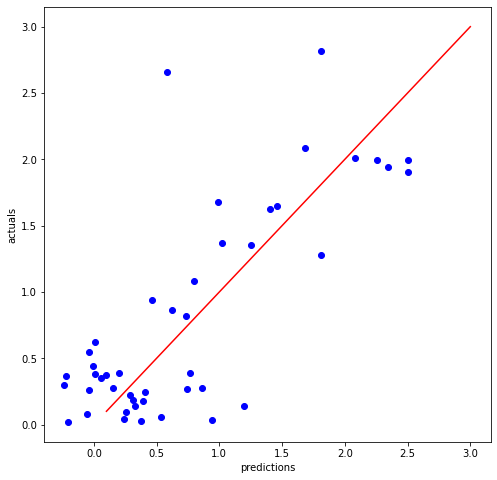

In [230]:
predictions=[]
actuals=[]
model.eval()
with torch.no_grad():
    # Test out inference with 5 samples from the original test set
    for i in range(45):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        #print(f"{X_test_raw[i]} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")
        #plt.plot(y_pred[0].numpy(),y_test[i].numpy(),'bo',linestyle='dashed')
        predictions.append(y_pred)
        actuals.append(y_test[i])

#print(predictions,actuals)  
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('predictions')
ax.set_ylabel('actuals')
ax.plot(predictions,actuals,'bo')
a=np.linspace(0.1,3,500)
b=a
ax.plot(a,b, color='r')
plt.show()

In [232]:
from sklearn.metrics import r2_score

print(r2_score(predictions, actuals)," - r squared value (variance explained by conditions)")

0.5225074148258346  - r squared value (variance explained by conditions)


In [198]:
seta = (1,2)
setb = (2,2)
print(nn.MSELoss(seta, setb))

MSELoss()


C:\Users\user\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [2]:
"""
loss = nn.MSELoss()
input = torch.rand(3, 5, requires_grad=True)
target = torch(3, 5)
output = loss(input, target)
output.backward()
print(loss)
print(output)
"""

'\nloss = nn.MSELoss()\ninput = torch.rand(3, 5, requires_grad=True)\ntarget = torch(3, 5)\noutput = loss(input, target)\noutput.backward()\nprint(loss)\nprint(output)\n'

ModuleNotFoundError: No module named 'torchmetrics'